In [128]:
from arc import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad, dblquad
import scipy
from phase_noise import procData, p0dict_638

<h2>Transfer function</h2>

2.926744590523198


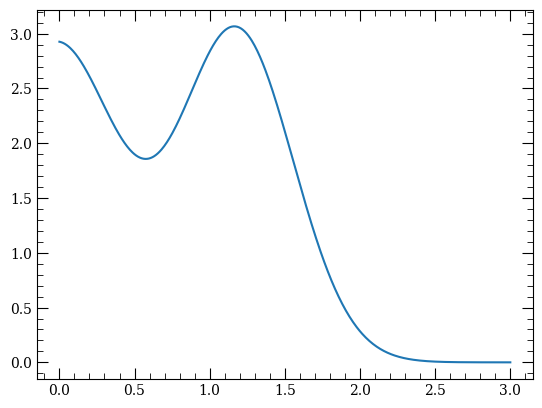

In [79]:
def gv(f):
    a = 2.910
    b = -0.02715
    c = 0.5874
    d = 3.022
    e = 1.179
    g = 0.5337
    return a*np.exp(-((f-b)/c)**2)+d*np.exp(-((f-e)/g)**2)

def gi(f):
    a = 1.187
    b = 6.423
    c = 0.7670
    d = 0.07678
    e = 5.528
    g =0.2381
    return a*(1+d*np.tanh(e*(f-g)))/(1+np.exp(b*(f-c)))
f = np.linspace(0,3,500)
g = gv(f)
print(gv(0))
plt.plot(f,g)

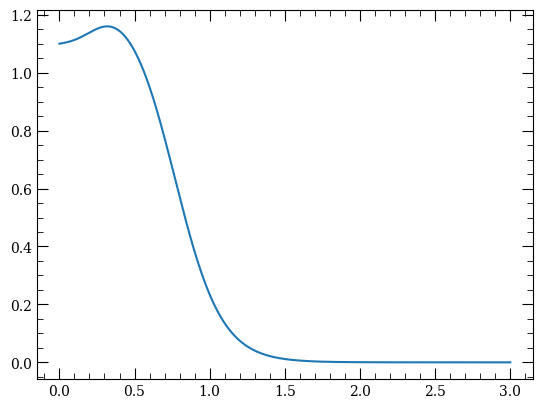

In [80]:
plt.plot(f,gi(f))

<h2>Phase noise</h2>

In [8]:
phase_noise_csv = "638-narrower-scan_28-7-2025.csv"


930.4722569324001
sp: 73.17492600942683, sig: -215.25717813845702


/Users/linipunphuttitarn/Documents/Physics/AQUA/GateErrorSim/phase_noise.py:219: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(white_noise + bump_noise + nf)


Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
Noise fit of 638nm
td: 0.01989311789835006 ms
noise floor: 1.8330216629684246e-09 = -87.36832402439828 dB
white noise amp, h0: 3.16637412254051 Hz^2/Hz
1: ----- 
	f: 19.98752458355254 kHz, 
	s: 424.7088228763028 Hz, 
	h: 24.884347877545373 Hz^2/Hz,
2: ----- 
	f: 40.09436970502555 kHz, 
	s: 533.7167539882116 Hz, 
	h: 34.83496911264361 Hz^2/Hz,
3: ----- 
	f: 46.00639992903414 kHz, 
	s: 1222.2442915802997 Hz, 
	h: 47.14692222882732 Hz^2/Hz,
4: ----- 
	f: 73.47499686377031 kHz, 
	s: 778.0851150424184 Hz, 
	h: 3.496594703809975 Hz^2/Hz,
5: ----- 
	f: 118.33134763579518 kHz, 
	s: 510.05893503902945 Hz, 
	h: 695.7940578539783 Hz^2/Hz,
6: ----- 
	f: 139.22156627008494 kHz, 
	s: 538.2542330318881 Hz, 
	h: 35.92497117943899 Hz^2/Hz,
7: ----- 
	f: 236.83521869708022 kHz, 
	s: 473.09431477810296 Hz, 
	h: 3837.085925523791 Hz^2/Hz,
8: ----- 
	f: 341.2848951471928 kHz, 
	s: 126157.66121452689 Hz, 
	h: 67.88802

Text(0.5, 0, 'frequency [MHz]')

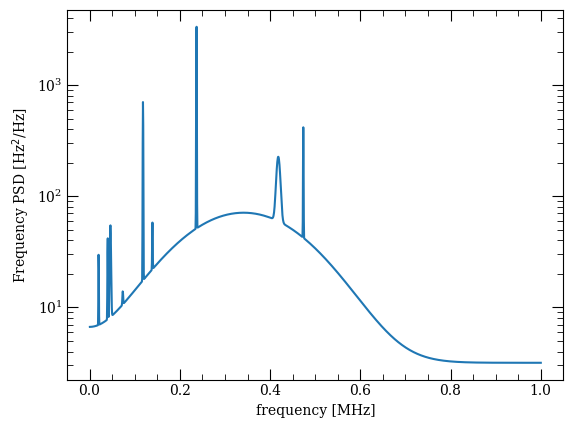

In [91]:
phase_noise_data = procData(phase_noise_csv, True, "638nm", range=1e6, p0=p0dict_638)
label = data_sets[1][1]
vnoise_data = data_sets[1][0]
vnoise_fs = []
vnoise_W = []
for d in vnoise_data:
    if d[0] >=0:
        vnoise_fs.append(d[0]/1e6)
        vnoise_W.append(d[1]*d[0]**2)
fig, ax = plt.subplots()
ax.plot(vnoise_fs, vnoise_W, label=label)
ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_ylabel('Frequency PSD [Hz$^2$/Hz]')
ax.set_xlabel('frequency [MHz]')

error due to phase noise: 7.467062441966722e-05


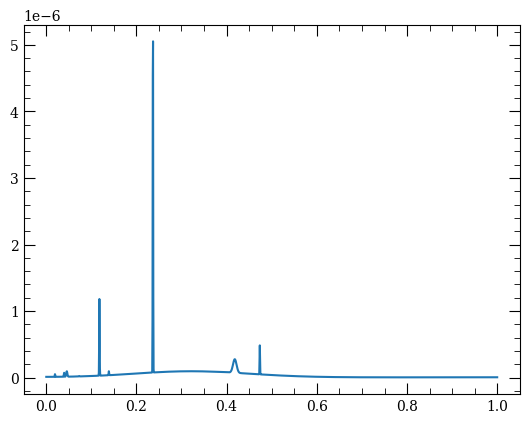

In [69]:
vnoise_fs= np.array(vnoise_fs)
vnoise_W = np.array(vnoise_W)
Omega_Rabi = 1*2*np.pi
contribution = []

# fs  = np.linspace(0,15,500)
# for f in fs:
for i in range(len(f)-1):
    deltaf = f[i+1]-f[i]
    If = gv(f[i]*2*np.pi/Omega_Rabi)/Omega_Rabi**2*4*np.pi*np.pi
    contribution.append(If*phase[i]*deltaf/1e6)
plt.plot(f[:-1], contribution)
print('error due to phase noise:', np.sum(contribution))

<h2>Intensity noise</h2>

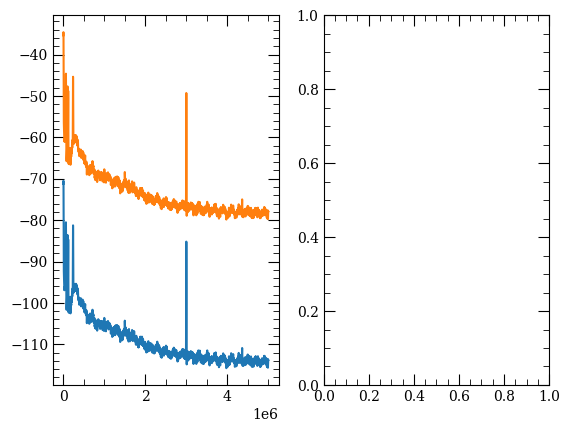

In [126]:
def db_to_w(db):
    # Convert from db to Watt 
    return 10**(db/10)
def w_to_db(db):
    # Convert from watt to db
    return 10*np.log10(db)
RIN_csv_path = 'UV_Intensity_Nov25.csv'    
intensity_noise_csv = pd.read_csv(RIN_csv_path, header=None)
intensity_DC_V = 10.105
fs_intensity = intensity_noise_csv[0]
RIN_db = intensity_noise_csv[1]
rbw = fs[1]-fs[0]
carrier_p = (intensity_DC_V**2/50)
RIN_dbc = (RIN_db-w_to_db(carrier_p)-w_to_db(rbw)) #convert to dBc/Hz= db(W_RIN/W_carrier/Hz) = db(W_RIN)-db(W_carrier)-db(Hz) 

fig , ax = plt.subplots(ncols=2)
ax[0].plot(fs_intensity, RIN_dbc)
ax[0].plot(fs_intensity, RIN_db)
RIN_W = db_to_w(RIN_dbc)


error due to phase noise: 0.0008556932092556828


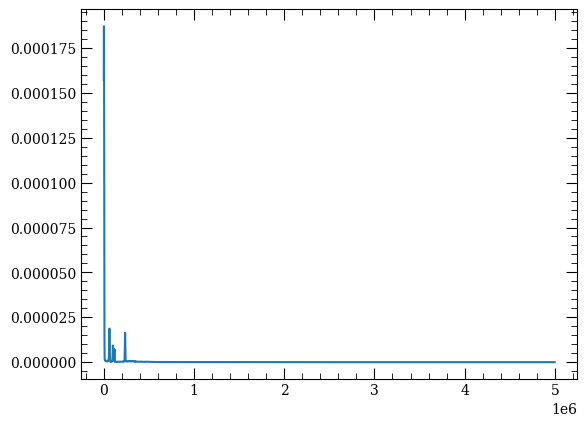

In [127]:
fs_intensity = np.array(fs_intensity)
RIN_W = np.array(RIN_W)
Omega_Rabi = 1*2*np.pi
contribution = []

# fs  = np.linspace(0,15,500)
# for f in fs:
for i in range(len(fs_intensity)-1):
    deltaf = fs_intensity[i+1]-fs_intensity[i]
    Ii = gi(fs_intensity[i]/1e6*2*np.pi/Omega_Rabi)
    contribution.append(Ii*RIN_W[i]*deltaf)
plt.plot(fs[:-1], contribution)
print('error due to phase noise:', np.sum(contribution))

<h2> linear response </h2>

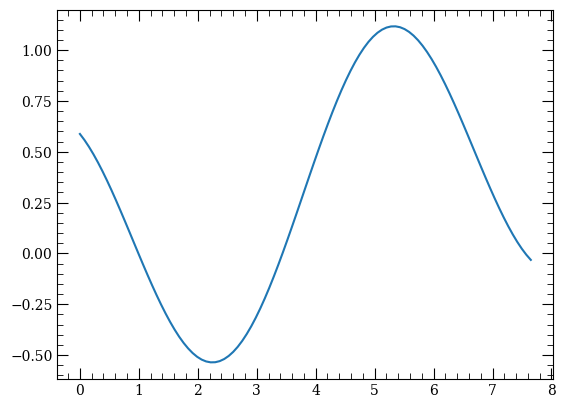

In [60]:
plt.plot(times,phases)

In [74]:
OH01, OH11 = OH(25)
OH01tau, OH11tau = OH(75)
print(OH01[0,0]-OH01tau[0,0])

-2.31533890900255e-17j


In [107]:
OH01t, OH11t = OH(12)
OH01tau, OH11tau = OH(0)
print(np.trace(psi11@OH11t@OH11tau),np.trace(psi11@OH11t)*np.trace(psi11@OH11tau))
# print(np.abs(OH01t/np.pi))

(14.588760419540103-8.66825573616299j) (9.86960440108936+2.2159770912504638e-16j)


In [390]:
A,w, phi, gamma = [2*np.pi*0.1122, 1.0431, -0.7318, 0]#[ 0.71228826,  1.0858492 , -0.60055236,  0]

In [186]:
rabi_rate = Rabi*2*np.pi

In [204]:
Oi01 = np.diag([0, -2*np.pi])
# Oi11 = np.diag([0, -2*np.pi, -2*np.pi])
Oi11 = np.diag([0, -2*np.pi])
psi01 = np.diag([1,0]).astype(dtype=np.complex64)  # single atom state ground and Rydberg
# psi11 = np.diag([1,0,0]).astype(dtype=np.complex64) # two atom state ground-ground, ground-Rydberg, Rydberg-Rydberg 
psi11 = np.diag([1,0]).astype(dtype=np.complex64)

def phases_t(t, A,w,phi,gamma):
    return A*np.cos(w*rabi_rate*t-phi)+gamma*t
def OH(t):
    phases = phases_t(t,A,w,phi,gamma)
    Omega = rabi_rate*np.exp(1j*phases)  
    # print(np.abs(Omega))
    H01 = 0.5*np.array([[0, Omega], [np.conj(Omega), 0]]) 
    # print(np.conj(H01).T)
    H11 = np.sqrt(2)*H01
    # H11 = np.sqrt(2)*0.5*np.array([[0, Omega, 0], [np.conj(Omega), 0, Omega], [0, np.conj(Omega),0]])
    # H11[2,2] = V*np.pi*2/rabi_rate
    OH01 = np.conj(H01).T@Oi01@H01
    OH11 = np.conj(H11).T@Oi11@H11
    return OH01, OH11

    
def linear_response01(t,tau,f):
    # f=0.32*Rabi
    # t = times[t_index]
    # tau = times[tau_index]
    OH01t, OH11t = OH(t)
    OH01tau, OH11tau = OH(tau)
    exOH01_c = np.trace(psi01@OH01t@OH01tau)-np.trace(psi01@OH01t)*np.trace(psi01@OH01tau)
    res01 = np.cos(2*np.pi*f*(t-tau))*exOH01_c
    # print(np.cos(2*np.pi*f*(t-tau)), np.trace(psi01@OH01t@OH01tau), np.trace(psi01@OH01t)*np.trace(psi01@OH01tau))
    return res01

def linear_response11(t,tau,f):
    # t = times[t_index]
    # tau = times[tau_index]
    OH01t, OH11t = OH(t)
    OH01tau, OH11tau = OH(tau)
    exOH11_c = np.trace(psi11@OH11t@OH11tau)-np.trace(psi11@OH11t)*np.trace(psi11@OH11tau)
    res11 = np.cos(2*np.pi*f*(t-tau))*exOH11_c
    # print(np.cos(2*np.pi*f*(t-tau)), np.trace(psi01@OH01t@OH01tau), np.trace(psi01@OH01t)*np.trace(psi01@OH01tau))
    return res11
    
# linear_response01(0.32,0,12)
# linear_response11(0.32,0,12)
fs = np.linspace(0,3*Rabi,50)
response = []
for f in fs:
    val, err = dblquad(linear_response11, 0, 7.65/rabi_rate, lambda tau: 0, lambda tau:7.65/rabi_rate, args=[f])
    response.append(val)


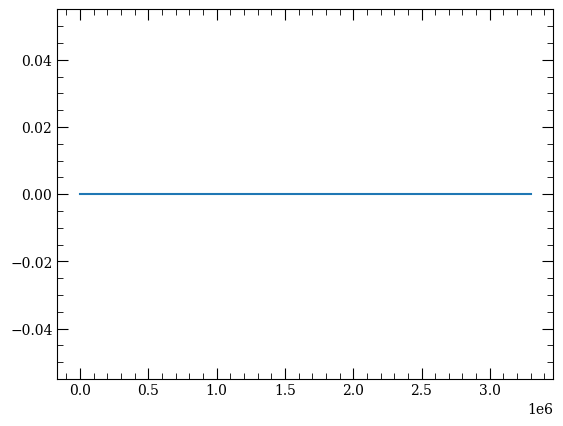

In [206]:
response = np.array(response)

plt.plot(fs,response)

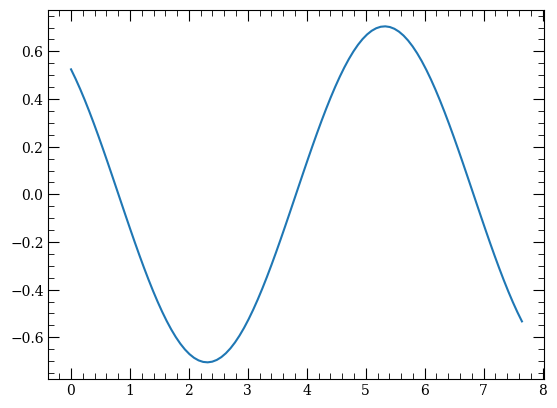

In [404]:
t = np.linspace(0,7.65, 100)
phases = phases_t(t,A,w,phi,gamma)
plt.plot(t,phases)

In [ ]:
psi01 = np.array([1,0], complex)  # single atom state ground and Rydberg
    psi11 = np.array([1,0,0], complex) # two atom state ground-ground, ground-Rydberg, Rydberg-Rydberg 
    if B is None:  #None is infinite blockade
        psi11 = np.array([1,0], complex)  # dont need the 3rd element if blockade is infinite
        
    for i in range(resolution):  #loop over small time increments and apply small unitary rotations at each step
        dt = times[i+1]-times[i]  #time increment difference
        Omega = np.exp(1j*phases(t)  #set up the complex Rabi frequency
        H01 = 0.5*np.array([[0, Omega], [np.conj(Omega), 0]]) #Hamiltonian for one atom 
                if B is None:
            H11 = np.sqrt(2)*H01   # Hamiltonian for two atoms when the blockade is infinite
        else:
            H11 = np.sqrt(2)*0.5*np.array([[0, Omega, 0], [np.conj(Omega), 0, Omega], [0, np.conj(Omega), 0]])   # Hamiltonian for two atoms
            H11[2,2] = B-1j*DecayRate # add in finite blockade and decay for the double exciation term
        H01[1,1] = -1j*DecayRate/2  # add in decay for the single excitation term for the one atom Hamiltonian
        H11[1,1] = -1j*DecayRate/2  # add in decay for the single excitation term for the two atom Hamiltonian
        psi01 = scipy.linalg.expm(-1j*H01*dt)@psi01  #evolve input 1 atom state in time
        psi11 = scipy.linalg.expm(-1j*H11*dt)@psi11  #evolve 2 atom state
    
    # Apply single qubit gates
    phase = psi01[0]/np.abs(psi01[0]) # Calculate the phase shift induced on the ground state for 1 atom
    psi01/=phase  # divide 1 atom state by phase shift
    psi11/=phase**2 #divide 2 atom state by 1 atom phase shift on each atom

In [430]:
np.abs(psi[3])

np.float64(0.9986443005226029)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 6.71540211e+01
 0.00000000e+00 0.00000000e+00 4.76543977e+01 4.76543977e+01
 4.77240549e-06]


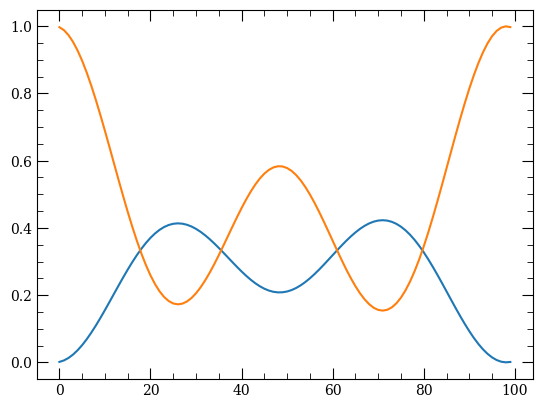

In [429]:
psi = np.zeros((9),complex)
psi[3] = 1
population = []
resolution = 100
dt = 2*np.pi/100
ts = np.linspace(0, 7.65,resolution)
for t in ts:
    H0 = Ht(t)
    dt = ts[1]-ts[0]
    psi = scipy.linalg.expm(-1j*H0*dt)@psi
    population.append(psi)

population = np.array(population)
# plt.plot(abs(population[:,-5,0]**2))
# plt.plot(abs(population[:,-3]**2))
plt.plot(abs(population[:,-2]**2))
plt.plot(abs(population[:,3]**2))
print(np.sum(np.abs(population),axis=0))
psi01 = psi[2]

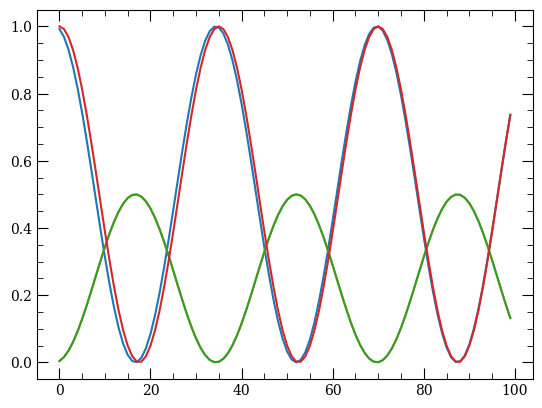

In [342]:
psi = np.zeros((9,1),complex)
psi[3] = 1
population = []
resolution = 100
dt = 2*np.pi/100
O = 1
d = 1
V=1e10
H0 = np.array([[0,0,0,0,0,0,0,0,0],
               [0,0,0,0,O,0,0,0,0],
               [0,0,0,0,0,O,0,0,0],
               [0,0,0,0,0,0,O,O,0],
               [0,d,0,0,d1,0,0,0,0],
               [0,0,d,0,0,d2,0,0,0],
               [0,0,0,d,0,0,d2,0,O],
               [0,0,0,d,0,0,0,d1,O],
               [0,0,0,0,0,0,d,d,V+d1+d2]
              ])
for i in range(resolution):
    # O = 1
    psi = scipy.linalg.expm(-1j*H0*dt)@psi
    population.append(psi)
    
population = np.array(population)
plt.plot(abs(population[:,3,0]**2))
plt.plot(abs(population[:,-2,0]**2))
plt.plot(abs(population[:,-3,0]**2))
t = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(np.sqrt(2)*t)**2)

In [441]:
d1 =0 
d2 =0 
V= 10000000
oi  = np.array([[0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,-2*np.pi,0,0,0,0],
               [0,0,0,0,0,-2*np.pi,0,0,0],
               [0,0,0,0,0,0,-2*np.pi,0,0],
               [0,0,0,0,0,0,0,-2*np.pi,0],
               [0,0,0,0,0,0,0,0,-2*np.pi]])

def Ht(t):
    phases = phases_t(t,A,w,phi,gamma)
    O = 1*np.exp(-1j*phases)/2
    d = 1*np.exp(1j*phases)/2
    # print(np.abs(Omega))
    H0 = np.array([[0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,O,0,0,0,0],
                   [0,0,0,0,0,O,0,0,0],
                   [0,0,0,0,0,0,O,O,0],
                   [0,d,0,0,d1,0,0,0,0],
                   [0,0,d,0,0,d2,0,0,0],
                   [0,0,0,d,0,0,d2,0,O],
                   [0,0,0,d,0,0,0,d1,O],
                   [0,0,0,0,0,0,d,d,V+d1+d2]
                  ])
    return H0
def OH(t):
    H0 = Ht(t)
    OH = np.conj(H0).T@oi@H0
    return OH

def phases_t(t, A,w,phi,gamma):
    return A*np.cos(w*t-phi)+gamma*t

def linear_response(t,tau,f, pho):
    # f=0.32*Rabi
    # t = times[t_index]
    # tau = times[tau_index]
    OHt = OH(t)
    OHtau = OH(tau)
    exOH_c = np.trace(pho@OHt@OHtau)-np.trace(pho@OHt)*np.trace(pho@OHtau)
    res01 = np.cos(f*(t-tau))*exOH_c
    # print(np.cos(2*np.pi*f*(t-tau)), np.trace(psi01@OH01t@OH01tau), np.trace(psi01@OH01t)*np.trace(psi01@OH01tau))
    return res01

# val, err = dblquad(linear_response, 0, 7.65, lambda tau: 0, lambda tau:7.65, args=[f, pho])
# val/4/np.pi/np.pi

In [439]:
states = [{0:1},
          {1:1},
          {2:1},
          {3:1},
          
          {0:1/np.sqrt(2),3:1/np.sqrt(2)},
          {0:1/np.sqrt(2),3:-1/np.sqrt(2)},
          {1:1/np.sqrt(2),2:1/np.sqrt(2)},
          {1:1/np.sqrt(2),2:-1/np.sqrt(2)},
          {0:1/np.sqrt(2),3:1j/np.sqrt(2)},
          {0:1/np.sqrt(2),3:-1j/np.sqrt(2)},
          
          {0:1/np.sqrt(2),1:1/np.sqrt(2)},
          {0:1/np.sqrt(2),1:-1/np.sqrt(2)},
          {2:1/np.sqrt(2),3:1/np.sqrt(2)},
          {2:1/np.sqrt(2),3:-1/np.sqrt(2)},
          {0:1/np.sqrt(2),1:1j/np.sqrt(2)},
          {0:1/np.sqrt(2),1:-1j/np.sqrt(2)},
          {2:1/np.sqrt(2),3:1j/np.sqrt(2)},
          {2:1/np.sqrt(2),3:-1j/np.sqrt(2)},
          {0:1/2, 1:1/2, 2:1/2, 3:1/2},
          {0:1/2, 1:1j/2, 2:1/2, 3:1j/2}]
error = []
gv_new =[]
fs = np.linspace(0,5,100)
for f in fs:
    for state in states:
        psi = np.zeros((9,1),complex)
        for ind, val in state.items():
            psi[ind] = val
        pho = psi@psi.conj().T
        # print(pho.shape)
        val, err = dblquad(linear_response, 0, 7.65, lambda tau: 0, lambda tau:7.65, args=[f, pho])
        error.append(val)
    gv_new.append(np.mean(error)/4/np.pi/np.pi)

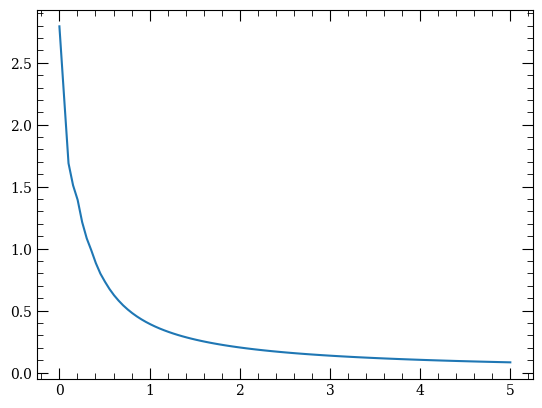

In [440]:
plt.plot(fs, gv_new)

<h2>Other stuff</h2>

In [3]:
cs = Cesium()
h = 6.626e-34

In [13]:
n=50
delta_edc = 10e-3
edc = 0.1
Rabi = 1.1e6 #MHz
B = 10
bdc = 1e-4
T = 15 #uK
w = 37e3
mcs = 133/6.022e23/1000
kb = 1.38e-23
V = 7.5
k = 2*np.pi/cs.getTransitionWavelength(n1=6,l1=0,j1=1/2,n2=n,l2=1,j2=3/2)

In [19]:
hbar= h/2/np.pi
omega = cs.getTransitionFrequency(n1=6,l1=0,j1=1/2,n2=55,l2=1,j2=3/2)*np.pi*2
sigma = 1e4*1e-28
p=50e-3
w = 1.5e-6
print('r loss=', sigma*2*p/np.pi/w**2/hbar/omega)

r loss= 22706.501133215206


In [17]:
calc = StarkMap(Caesium())
calc.defineBasis(n=50, l=1, j=1.5, mj=1.5, nMin=30, nMax=80, maxL=10, Bz=10/10000)
calc.diagonalise(np.linspace(0,60,600))
pol_dc = calc.getPolarizability(debugOutput=True)

finding original state for each electric field value
found  599
Scalar polarizability =  1102.6969473469449  MHz cm^2 / V^2 


NameError: name 'delta_edc' is not defined

In [22]:
delta_edc = -1/2*pol_dc*((edc+delta_edc)**2-edc**2) 
print(delta_edc)

-1.1578317947142909


In [21]:
# energy_shift = cs.getZeemanEnergyShift(l=1, j=3/2, mj=3/2, magneticFieldBz=B/10000)/h/1e6
energy_shift_1 = cs.getZeemanEnergyShift(l=1, j=3/2, mj=1/2, magneticFieldBz=B/10000)/h/1e6
delta_bdc = energy_shift_1
print(delta_bdc/2)

4.668169523441567


In [50]:
delta_mj = cs.getZeemanEnergyShift(l=1, j=3/2, mj=3/2, magneticFieldBz=B/10000)/h/1e6 - \
cs.getZeemanEnergyShift(l=1, j=3/2, mj=1/2, magneticFieldBz=B/10000)/h/1e6
leakage_mj  = (Rabi/1e6)**2/((Rabi/1e6)**2+delta_mj**2)
print(leakage_mj)

0.0034583393714874397


In [70]:
sigma_x = np.sqrt(h/(2*mcs*w*4*np.pi**2)/np.tanh(h*w/2/kb/T/1e-6))
print(delta_x/1e-6)
sigma_v = np.sqrt(h*w/(2*mcs)/np.tanh(h*w/2/kb/T/1e-6))
print(sigma_v)

0.13176551246451193
0.03063256388067037


In [79]:
doppler_shift = sigma_v*k
print(doppler_shift)

603501.2177923331
